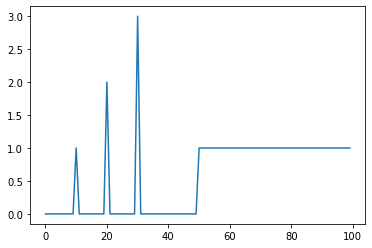

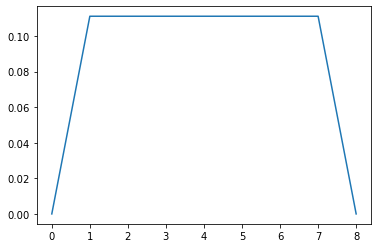

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import numpy as np

from numpy.fft import fft,ifft

from numpy.fft import fftshift

from numpy.fft import ifftshift


# Convolutions

v = np.zeros(100)

v[10] = 1
v[20] = 2
v[30] = 3
v[50:]=1

xv = np.arange(v.size)

plt.plot(xv,v)
plt.show()

windowSize = 9
boxSize = 7
k = np.zeros(windowSize)
k[windowSize//2-boxSize//2:windowSize//2 + boxSize//2 +1] = 1.0/windowSize
plt.plot(k)

result size: 92


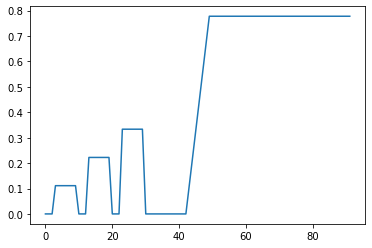

In [2]:
result = np.convolve(v,k,'valid')
print('result size:', result.size)
plt.plot(result)

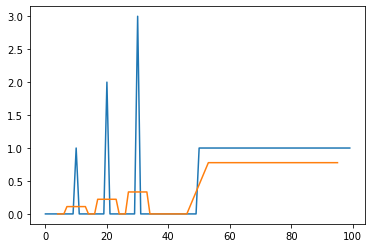

In [3]:
shift = (v.size-result.size) //2

plt.plot(xv,v)
plt.plot(xv[shift:-shift],result)

In [4]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Text(0, 0.5, 'Passengers')

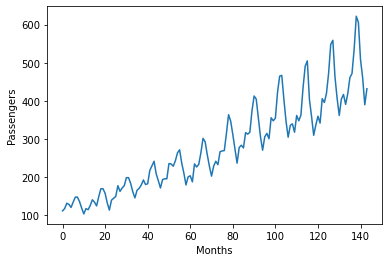

In [5]:
passengers = np.array(flights["passengers"])
months = np.arange(passengers.size)
sns.lineplot(x=months,y=passengers)
plt.xlabel("Months")
plt.ylabel("Passengers")

In [6]:
passengersFFT_ = fft(passengers)

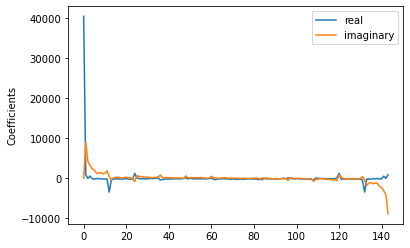

In [7]:
# We will use this as x-axis to plot our coefficients against
freqs=np.arange(passengers.size)

# The result is an array of complex numbers
# We will plot the real and imagnary components seperately
sns.lineplot(x=freqs, y=passengersFFT_.real, label = 'real')
sns.lineplot(x=freqs, y=passengersFFT_.imag, label = 'imaginary')
plt.ylabel('Coefficients')
plt.legend()

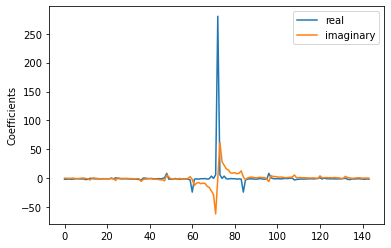

In [8]:
# We shift the results
passengersFFT = fftshift(passengersFFT_)

# We normalise the results to make the coefficients independent of the length of the sequence
passengersFFT = passengersFFT/passengers.size

# Lets plot the results again
sns.lineplot(x=freqs, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqs, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
plt.legend()

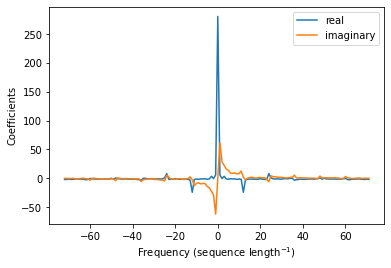

In [9]:
# We will use this as x-axis to plot our coefficients against
freqs = np.arange(passengers.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (passengers.size)//2

# Lets plot the results again
sns.lineplot(x=freqs, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqs, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now corresponds to the frequency as repetitions per sequence length
plt.xlabel('Frequency (sequence length$^{-1}$)')
plt.legend()

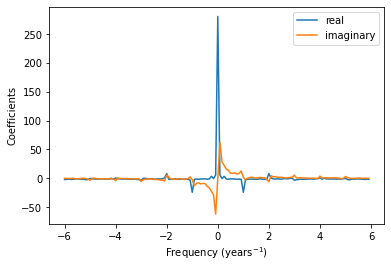

In [10]:
# We have 12 years in the time series.
freqsYears = freqs/12.0

# Lets plot the results again
sns.lineplot(x=freqsYears, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqsYears, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (years$^{-1}$)')
plt.legend()